imports - numpy just to read data

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


parameter 'patience' is the number of epochs to proceed without improvement

In [2]:
early_stopping_monitor = EarlyStopping(patience=3)

read the data so we can find the number of nodes in the input layer (n_cols)

In [3]:
data_file = 'hourly_wages.csv'

use pandas to examine the file since we had a problem loading into numpy

In [4]:
df = pd.read_csv(data_file)

In [5]:
df = df.reindex(np.random.permutation(df.index))

In [ ]:
df.columns

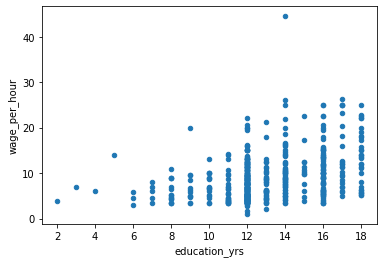

In [8]:
df.plot(x='education_yrs', y='wage_per_hour',kind='scatter')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [7]:
df.corr()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
wage_per_hour,1.000000,0.161766,0.381922,0.087060,0.176967,-0.205371,0.100579,-0.141031,0.053927,0.008314
union,0.161766,1.000000,-0.023886,0.117926,0.119466,-0.157027,0.093164,-0.086275,0.040185,0.086748
education_yrs,0.381922,-0.023886,1.000000,-0.352676,-0.150019,0.002031,-0.035522,-0.140143,-0.119605,-0.133006
experience_yrs,0.087060,0.117926,-0.352676,1.000000,0.977961,0.075230,0.270900,-0.007407,0.063746,0.084971
age,0.176967,0.119466,-0.150019,0.977961,1.000000,0.079179,0.278947,-0.038665,0.040926,0.060178
female,-0.205371,-0.157027,0.002031,0.075230,0.079179,1.000000,0.011225,-0.021264,-0.062097,-0.163457
marr,0.100579,0.093164,-0.035522,0.270900,0.278947,0.011225,1.000000,0.006523,0.031559,0.043169
south,-0.141031,-0.086275,-0.140143,-0.007407,-0.038665,-0.021264,0.006523,1.000000,-0.062747,0.059407
manufacturing,0.053927,0.040185,-0.119605,0.063746,0.040926,-0.062097,0.031559,-0.062747,1.000000,-0.103489
construction,0.008314,0.086748,-0.133006,0.084971,0.060178,-0.163457,0.043169,0.059407,-0.103489,1.000000


In [ ]:
df.describe()

first row was a text headers which numpy could not handle. 
had to add "skiprows=1" parameter to get the loadtxt method to work

In [ ]:
# predictors = np.loadtxt(data_file, delimiter=',', skiprows=1)

In [ ]:
df.info()

In [ ]:
df.union = df.union.astype('bool')
df.female = df.female.astype('bool')
df.marr = df.marr.astype('bool')
df.south = df.south.astype('bool')
df.manufacturing = df.manufacturing.astype('bool')
df.construction = df.construction.astype('bool')

In [ ]:
df.columns

In [ ]:
# predictors = df.drop(['wage_per_hour','union','education_yrs','experience_yrs',
#                       'age', 'female', 'marr', 'south', 'manufacturing','construction',
#                      ], axis=1)

based on correlation, use only education_yrs and age for features

In [9]:
predictors = df.drop(['wage_per_hour','union','experience_yrs',
                      'female', 'marr', 'south', 'manufacturing','construction',
                     ], axis=1)

In [ ]:
predictors.describe()

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
df.plot()

In [ ]:
df20 = df.head(20)

In [10]:
target = df.wage_per_hour

In [ ]:
transformer = Normalizer().fit(df)

In [ ]:
df_norm = transformer.transform(df)

In [ ]:
df_norm[1:3,1:5]

In [ ]:
df_target = df_norm[0:,0:1]

In [ ]:
df_target

In [ ]:
df_my = pd.DataFrame(df_norm)

In [ ]:
target2 = df_my

In [ ]:
df_my.columns

In [ ]:
target2([1:],[1:])

In [ ]:
df20['wage_per_hour'].plot(kind='bar')

In [ ]:
target.mean()

In [ ]:
target.std()

In [ ]:
target

In [ ]:
df.head()

In [11]:
n_cols = predictors.shape[1]

In [12]:
n_cols

2

Sequential model - each layer connected only to the previous layer

In [13]:
from keras import optimizers

In [14]:
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model = Sequential()

build up model layer at a time - 'Dense' layers are fully connected

In [16]:
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))

In [17]:
model.add(Dense(100, activation='relu'))

In [18]:
model.add(Dense(1))

dump out the model configuration

In [ ]:
model.get_config()

'adam' is a good, general purpose optimizer that adjusts the learning rate as it goes

In [19]:
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
# model.compile(optimizer=adam, loss='mean_squared_error')

In [ ]:
# model.compile(optimizer='adam', loss='mean_squared_error')

need to split out the target column from the data

In [ ]:
for l in range(0,len(target)) :
    if target[l] > 40:
        target[l] = 9.0

In [ ]:
if (target>40) 

In [ ]:
target.describe()

In [20]:
model.fit(predictors, target, validation_split=0.3, epochs=20)

Instructions for updating:
Use tf.cast instead.
Train on 373 samples, validate on 161 samples
Epoch 1/20
373/373 [==============================] - 1s 2ms/step - loss: 49.6206 - acc: 0.0241 - val_loss: 30.9089 - val_acc: 0.0124
Epoch 2/20
373/373 [==============================] - 0s 266us/step - loss: 23.3864 - acc: 0.0161 - val_loss: 33.1755 - val_acc: 0.0124
Epoch 3/20
373/373 [==============================] - 0s 273us/step - loss: 19.5546 - acc: 0.0349 - val_loss: 30.8145 - val_acc: 0.0248
Epoch 4/20
373/373 [==============================] - 0s 227us/step - loss: 18.3465 - acc: 0.0429 - val_loss: 30.2510 - val_acc: 0.0248
Epoch 5/20
373/373 [==============================] - 0s 202us/step - loss: 18.6162 - acc: 0.0322 - val_loss: 29.1420 - val_acc: 0.0124
Epoch 6/20
373/373 [==============================] - 0s 219us/step - loss: 19.1312 - acc: 0.0349 - val_loss: 30.4998 - val_acc: 0.0248
Epoch 7/20
373/373 [==============================] - 0s 214us/step - loss: 20.3815 - acc: 0

In [ ]:
model.predict()

In [ ]:
model.fit(predictors, target, validation_split=0.3, epochs=20, 
          callbacks = [early_stopping_monitor])

this model is not doing very well. Maybe need to look at scaling the data. 
Find the mean of each feature and divide by standard deviation.

In [ ]:
from keras.models import load_model

In [ ]:
model.save('model_file.h5')

In [ ]:
my_model = load_model('model_file.h5')